<a href="https://colab.research.google.com/github/Q-Nhabinde/ML-DA-S/blob/main/ML_05_%20Air%20Quality%20DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PRATICAL 5-Data Cleaning and Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Air Quality Dataset

In [ ]:
df = pd.read_csv("Air_Quality.csv",encoding='cp1252')
print(df)

df.dtypes

       stn_code       sampling_date           state   location  \
0         150.0  February - M021990  Andhra Pradesh  Hyderabad   
1         151.0  February - M021990  Andhra Pradesh  Hyderabad   
2         152.0  February - M021990  Andhra Pradesh  Hyderabad   
3         150.0     March - M031990  Andhra Pradesh  Hyderabad   
4         151.0     March - M031990  Andhra Pradesh  Hyderabad   
...         ...                 ...             ...        ...   
97418     155.0           12/5/2012         Gujarat  Ahmedabad   
97419     155.0          16/05/2012         Gujarat  Ahmedabad   
97420     155.0          19/05/2012         Gujarat  Ahmedabad   
97421     155.0          23/05/2012         Gujarat  Ahmedabad   
97422     155.0          26/05/2012         Gujarat  Ahmedabad   

                                                  agency  \
0                                                    NaN   
1                                                    NaN   
2                          

stn_code                       float64
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [ ]:
print("1. Displaying all columns:", df.keys())
print('--------------------------------------------------------------------------------')
print("2. The first ten rows of the dataset are:",df.head(10))
print('--------------------------------------------------------------------------------')
print("3. The data shape is:", df.shape)
print('--------------------------------------------------------------------------------')
print("4. Return the number of null values in each column:", df.isnull().sum())
print('--------------------------------------------------------------------------------')
print("5. Using describe() to display the generated descriptive statistics:", df.describe())

1. Displaying all columns: Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
--------------------------------------------------------------------------------
2. The first ten rows of the dataset are:    stn_code       sampling_date           state   location agency  \
0     150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1     151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2     152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3     150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4     151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
5     152.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
6     150.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
7     151.0     April - M041990  Andhra Pradesh  Hyderabad    NaN   
8     152.0     April - M041990  Andhra 

In [ ]:
import pandas as pd

#6. Cleaning The Dataset:

# Checking if the columns exist in the DataFrame before attempting to drop them
columns_to_drop = ['stn_code', 'agency', 'sampling_date', 'location_monitoring_agency']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if columns_to_drop:
    # Drop the columns if they exist
    df = df.drop(columns=columns_to_drop)
    print("Dropping less valued columns:")
    print(df)
else:
    print("Columns to drop not found in the DataFrame.")




Dropping less valued columns:
                state   location                                type   so2  \
0      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.8   
1      Andhra Pradesh  Hyderabad                     Industrial Area   3.1   
2      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2   
3      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3   
4      Andhra Pradesh  Hyderabad                     Industrial Area   4.7   
...               ...        ...                                 ...   ...   
97418         Gujarat  Ahmedabad  Residential, Rural and other Areas  11.0   
97419         Gujarat  Ahmedabad  Residential, Rural and other Areas  10.0   
97420         Gujarat  Ahmedabad  Residential, Rural and other Areas   9.0   
97421         Gujarat  Ahmedabad  Residential, Rural and other Areas  10.0   
97422         Gujarat  Ahmedabad                                 NaN   NaN   

        no2  rspm  spm           

In [ ]:
import pandas as pd

#6. Cleaning The Dataset:

# b. Drop rows where no date is available
df = df.dropna(subset=['date'])
print("Dropping rows where no date is available:")
print(df)
print('--------------------------------------------------------------------------------')

# c. Clean 'type' column
df['type'] = df['type'].str.replace('Industrial Areas', 'Industrial Area')
print("Cleaning the 'type' column:")
print(df['type'])
print('--------------------------------------------------------------------------------')

# d. Create a new column holding year values
df['year'] = pd.to_datetime(df['date']).dt.year
print("Creating a new column holding year values:")
print(df['year'])

Dropping rows where no date is available:
                state   location                                type   so2  \
0      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.8   
1      Andhra Pradesh  Hyderabad                     Industrial Area   3.1   
2      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2   
3      Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3   
4      Andhra Pradesh  Hyderabad                     Industrial Area   4.7   
...               ...        ...                                 ...   ...   
97417         Gujarat  Ahmedabad  Residential, Rural and other Areas  13.0   
97418         Gujarat  Ahmedabad  Residential, Rural and other Areas  11.0   
97419         Gujarat  Ahmedabad  Residential, Rural and other Areas  10.0   
97420         Gujarat  Ahmedabad  Residential, Rural and other Areas   9.0   
97421         Gujarat  Ahmedabad  Residential, Rural and other Areas  10.0   

        no2  rspm  sp

In [ ]:
# f. Check the number of null values in each column
print("\nNumber of Null Values in Each Column After Cleansing:")
df2=df.isnull().sum()
print(df2)



Number of Null Values in Each Column After Cleansing:
state                             0
location                          0
type                           1628
so2                               0
no2                               0
rspm                              0
spm                               0
location_monitoring_station    7373
pm2_5                             0
date                              0
year                              0
dtype: int64


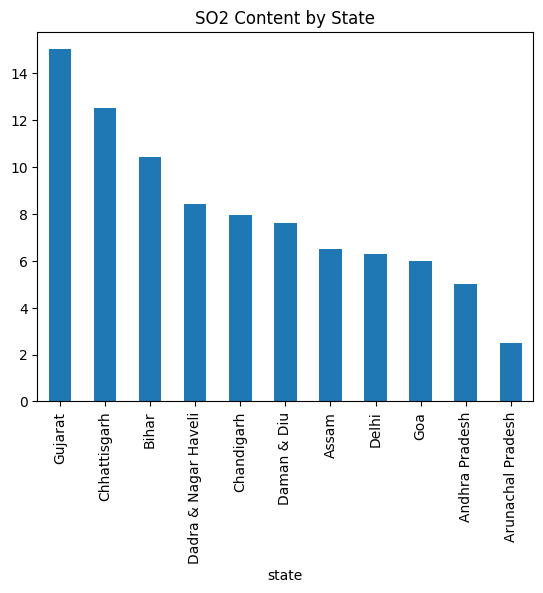

In [ ]:
# 7. State with higher SO2 content
so2_median = df.groupby('state')['so2'].median().sort_values(ascending=False)
so2_median.plot(kind='bar')
plt.title('SO2 Content by State')
plt.show()

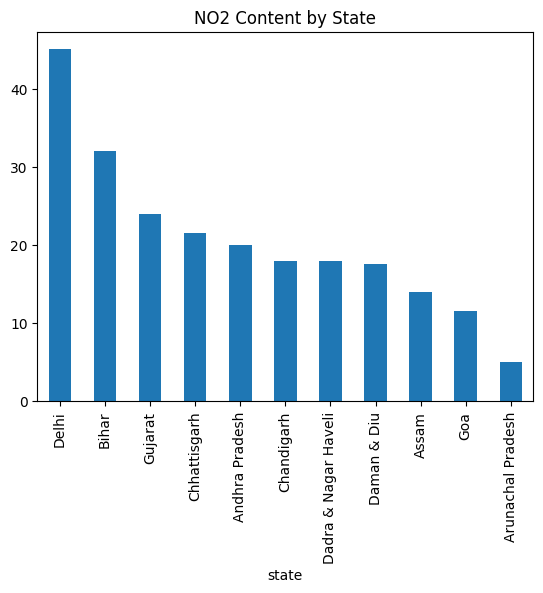

In [ ]:
# 8. State with higher NO2 content
no2_median = df.groupby('state')['no2'].median().sort_values(ascending=False)
no2_median.plot(kind='bar')
plt.title('NO2 Content by State')
plt.show()

In [ ]:
df['year']=pd.to_datetime(df['date'].astype(str), format ='%Y-%m-%d').dt.year

In [ ]:
# 9. Create a new data frame containing only relevant columns
df_imp = df[['so2', 'state', 'year', 'no2', 'rspm', 'spm']]
print(df_imp)
print(df_imp.columns)

        so2           state  year   no2       rspm        spm
0       4.8  Andhra Pradesh  1990  17.4  99.148675  215.21488
1       3.1  Andhra Pradesh  1990   7.0  99.148675  215.21488
2       6.2  Andhra Pradesh  1990  28.5  99.148675  215.21488
3       6.3  Andhra Pradesh  1990  14.7  99.148675  215.21488
4       4.7  Andhra Pradesh  1990   7.5  99.148675  215.21488
...     ...             ...   ...   ...        ...        ...
97417  13.0         Gujarat  2012  24.0  74.000000  215.21488
97418  11.0         Gujarat  2012  21.0  83.000000  215.21488
97419  10.0         Gujarat  2012  19.0  74.000000  215.21488
97420   9.0         Gujarat  2012  16.0  71.000000  215.21488
97421  10.0         Gujarat  2012  21.0  82.000000  215.21488

[97422 rows x 6 columns]
Index(['so2', 'state', 'year', 'no2', 'rspm', 'spm'], dtype='object')


Filter the data for Andhra Pradesh:
        so2    no2       rspm        spm
year                                    
1990   5.60  13.60  99.148675  179.00000
1991   8.25  12.80  99.148675  141.50000
1992  12.40  27.60  99.148675  192.00000
1993   6.00  11.40  99.148675  215.21488
1994   8.70  14.20  99.148675  215.21488
1995  14.10  26.30  99.148675  147.00000
1996  18.85  30.15  99.148675  181.50000
1997  16.40  28.40  99.148675  145.00000
1998  10.15  20.25  99.148675  152.00000
1999  13.35  17.05  99.148675  152.50000
2000  12.15  20.45  99.148675  128.50000
2001  12.50  24.00  99.148675  132.00000
2002   6.70  23.00  99.148675   86.00000
2004   8.00  32.00  85.150000  145.00000
2005   5.10  28.55  77.000000  208.00000
2006   5.80  30.30  88.000000  191.00000
2007   5.70  29.85  85.000000  184.00000
2008   5.20  26.40  81.500000  189.00000
2009   4.90  21.30  80.000000  195.00000
2010   4.00  13.00  67.000000  215.21488
2011   4.30  23.00  74.000000  215.21488
2012   5.00  13.00  7

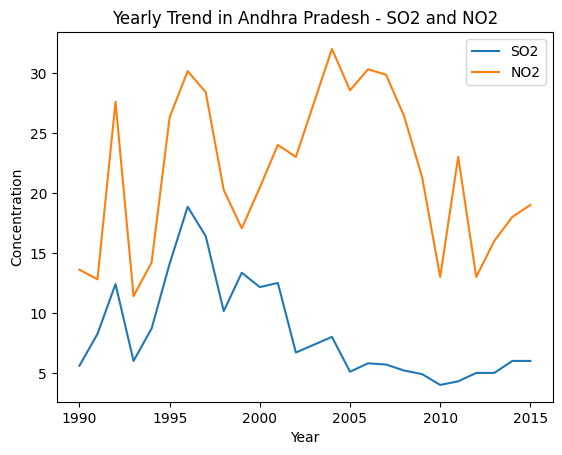

--------------------------------------------------------------------------------
Plot of RSPM and SPM:


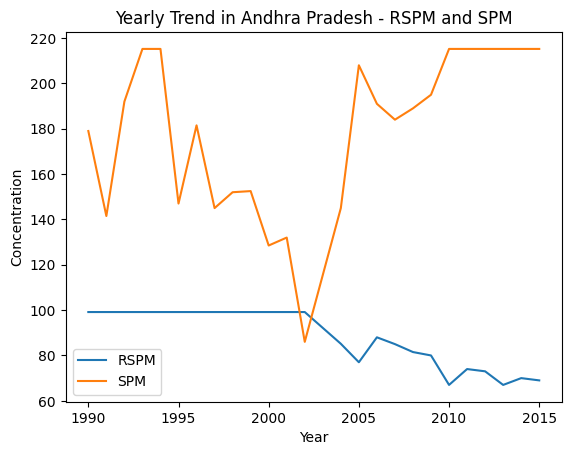

In [ ]:
# 10. Yearly trend in 'Andhra Pradesh'
import pandas as pd
import matplotlib.pyplot as plt

print ("Filter the data for Andhra Pradesh:")
andhra_pradesh = df_imp[df_imp['state'] == 'Andhra Pradesh'].groupby('year').median()
print(andhra_pradesh)

print('--------------------------------------------------------------------------------')

print("Plot SO2 and NO2:")
andhra_pradesh[['so2', 'no2']].plot(kind='line')
plt.title('Yearly Trend in Andhra Pradesh - SO2 and NO2')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend(['SO2', 'NO2'])
plt.show()

print('--------------------------------------------------------------------------------')

print ("Plot of RSPM and SPM:")
andhra_pradesh[['rspm', 'spm']].plot(kind='line')
plt.title('Yearly Trend in Andhra Pradesh - RSPM and SPM')
plt.xlabel('Year')
plt.ylabel('Concentration')
plt.legend(['RSPM', 'SPM'])
plt.show()


In [ ]:
#PRATICAL 5B - Data Cleaning and Exploration

In [ ]:
#Titanic Dataset

In [ ]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

df = pd.read_csv(url, encoding='cp1252')

# 2. Display the dataset
print("Dataset:")
print(df)

Dataset:
      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     fema

In [ ]:
# 3. Find out if any column contains Null values
null_values = df.isnull()
print("\nNull Values in Each Column:")
print(null_values)

print('--------------------------------------------------------------------------------')

# 4. Drop rows with all NaN values
df = df.dropna(how="all")
print(df)

print('--------------------------------------------------------------------------------')

# 5. Check each column data type
print("\nData Types for Each Column:")
print(df.dtypes)

print('--------------------------------------------------------------------------------')

# 6. Generate descriptive statistics using describe()
print("\nDescriptive Statistics:")
print(df.describe())


Null Values in Each Column:
      pclass  survived   name    sex    age  sibsp  parch  ticket   fare  \
0      False     False  False  False  False  False  False   False  False   
1      False     False  False  False  False  False  False   False  False   
2      False     False  False  False  False  False  False   False  False   
3      False     False  False  False  False  False  False   False  False   
4      False     False  False  False  False  False  False   False  False   
...      ...       ...    ...    ...    ...    ...    ...     ...    ...   
1305   False     False  False  False   True  False  False   False  False   
1306   False     False  False  False  False  False  False   False  False   
1307   False     False  False  False  False  False  False   False  False   
1308   False     False  False  False  False  False  False   False  False   
1309    True      True   True   True   True   True   True    True   True   

      cabin  embarked   boat   body  home.dest  
0     Fal

In [ ]:
# 7. Fill NaN values in each column

# a. Fill with median for numeric columns
numeric_columns = df.select_dtypes(include=['number'])
df_filled_median = df.copy()
df_filled_median[numeric_columns.columns] = df_filled_median[numeric_columns.columns].fillna(df_filled_median.median())
print("a. Fill with median for numeric columns:")
print(df_filled_median)
print('--------------------------------------------------------------------------------')

# b. Fill with a constant (e.g., 0)
df_filled_constant = df.fillna(0)
print("b. Fill with a constant:")
print(df_filled_constant)
print('--------------------------------------------------------------------------------')

# c. Forward Fill
df_filled_ffill = df.fillna(method='ffill')
print("c. Forward Fill:")
print(df_filled_ffill)

# c. Backward Fill
df_filled_bfill = df.fillna(method='bfill')
print("c. Backward Fill:")
print(df_filled_bfill)


a. Fill with median for numeric columns:
      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304     3.0       0.0                             Zabour, Miss. Hileni   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    c

In [ ]:
print("8. Convert appropriate columns to numeric data types:")
df['age'] = pd.to_numeric(df['age'], errors='coerce')
print(df['age'])
print('--------------------------------------------------------------------------------')
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')
print(df['fare'])

8. Convert appropriate columns to numeric data types:
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64
--------------------------------------------------------------------------------
0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64


9. Plot each numeric column with a box plot:


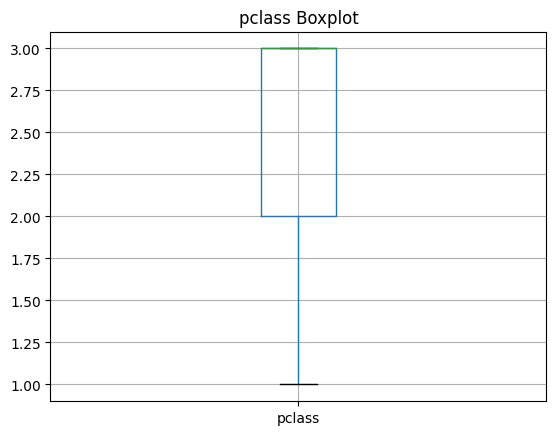

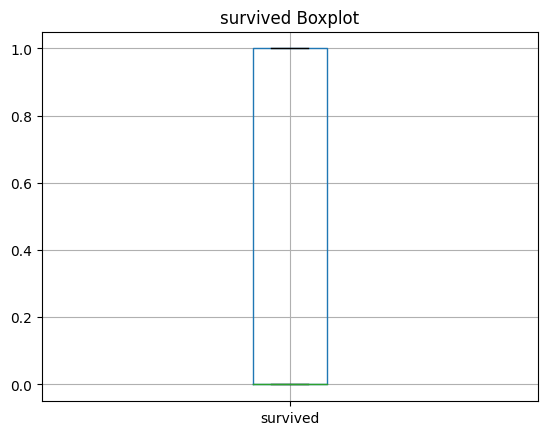

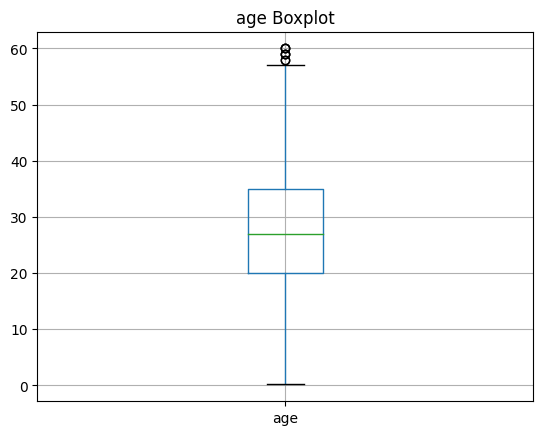

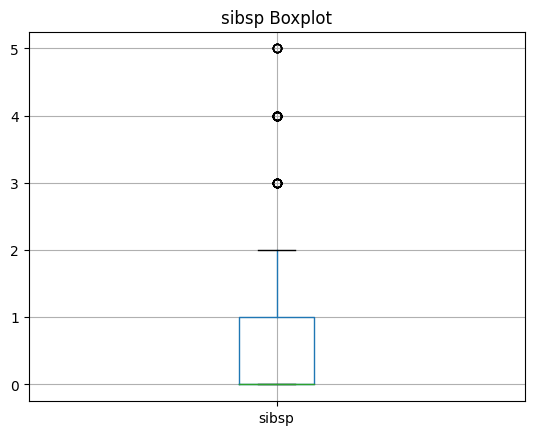

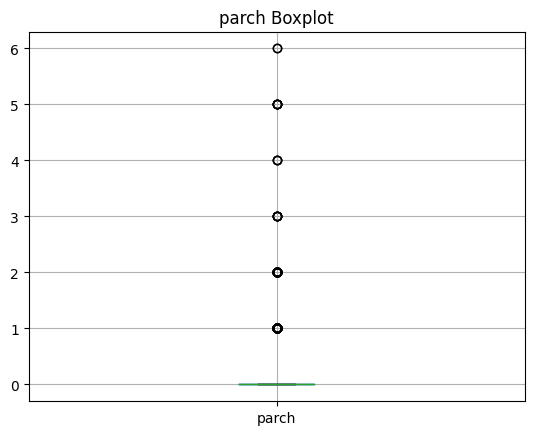

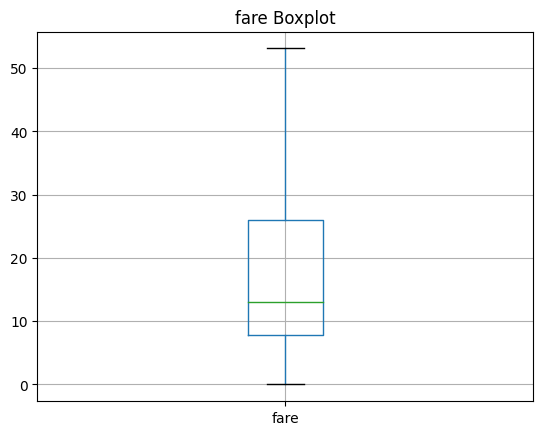

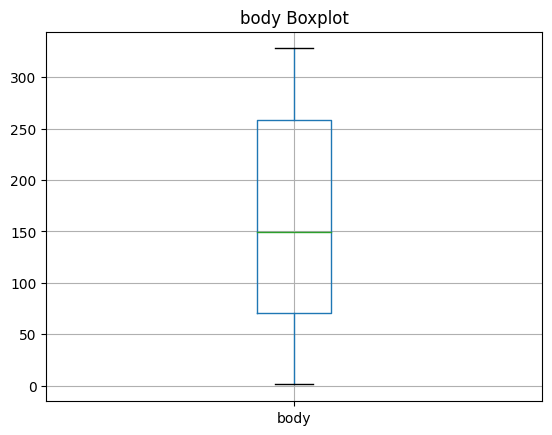

In [ ]:
print("9. Plot each numeric column with a box plot:")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for column in numeric_columns:
    df.boxplot(column=column)
    plt.title(f"{column} Boxplot")
    plt.show()

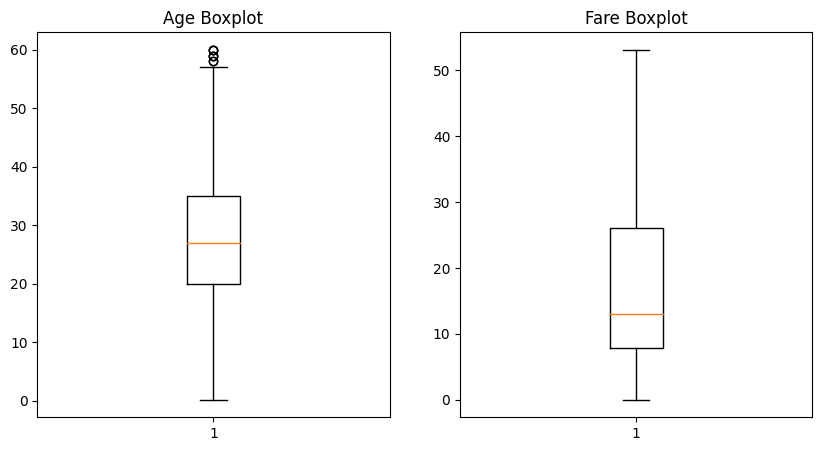

Remove or cap outliers for 'age':
      pclass  survived                                              name  \
5        1.0       1.0                               Anderson, Mr. Harry   
7        1.0       0.0                            Andrews, Mr. Thomas Jr   
8        1.0       1.0     Appleton, Mrs. Edward Dale (Charlotte Lamson)   
20       1.0       1.0                     Beckwith, Mr. Richard Leonard   
21       1.0       1.0  Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
...      ...       ...                                               ...   
1301     3.0       0.0                              Youseff, Mr. Gerious   
1304     3.0       0.0                              Zabour, Miss. Hileni   
1306     3.0       0.0                         Zakarian, Mr. Mapriededer   
1307     3.0       0.0                               Zakarian, Mr. Ortin   
1308     3.0       0.0                                Zimmerman, Mr. Leo   

         sex   age  sibsp  parch  ticket     fare cab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot boxplots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['age'])
plt.title("Age Boxplot")

plt.subplot(1, 2, 2)
plt.boxplot(df['fare'])
plt.title("Fare Boxplot")

plt.show()

# Identify and address outliers for the 'age' column
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
outlier_threshold_age = 1.5 * IQR_age

print("Remove or cap outliers for 'age':")
df2 = df[(df['age'] >= (Q1_age - outlier_threshold_age)) & (df['age'] <= (Q3_age + outlier_threshold_age))]
print(df2)
print('--------------------------------------------------------------------------------')

# Identify and address outliers for the 'fare' column
Q1_fare = df['fare'].quantile(0.25)
Q3_fare = df['fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
outlier_threshold_fare = 1.5 * IQR_fare


print(" Remove or cap outliers for 'fare':")
df3 = df[(df['fare'] >= (Q1_fare - outlier_threshold_fare)) & (df['fare'] <= (Q3_fare + outlier_threshold_fare))]
print(df3)

In [ ]:
# Display the cleaned dataset after handling outliers
print("Cleaned Dataset:")
print(df)

Cleaned Dataset:
      pclass  survived                                              name  \
5        1.0       1.0                               Anderson, Mr. Harry   
7        1.0       0.0                            Andrews, Mr. Thomas Jr   
8        1.0       1.0     Appleton, Mrs. Edward Dale (Charlotte Lamson)   
20       1.0       1.0                     Beckwith, Mr. Richard Leonard   
21       1.0       1.0  Beckwith, Mrs. Richard Leonard (Sallie Monypeny)   
...      ...       ...                                               ...   
1301     3.0       0.0                              Youseff, Mr. Gerious   
1304     3.0       0.0                              Zabour, Miss. Hileni   
1306     3.0       0.0                         Zakarian, Mr. Mapriededer   
1307     3.0       0.0                               Zakarian, Mr. Ortin   
1308     3.0       0.0                                Zimmerman, Mr. Leo   

         sex   age  sibsp  parch  ticket     fare cabin embarked boat 